In [2]:
import pandas as pd
import os

DATASET_PATH="dataset.xlsx"
data_df=pd.read_excel(DATASET_PATH,engine="openpyxl", sheet_name=None)
data=data_df["Train"]
# test_data_df=data_df["Test"]

<ipython-input-3-09979b686a8a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


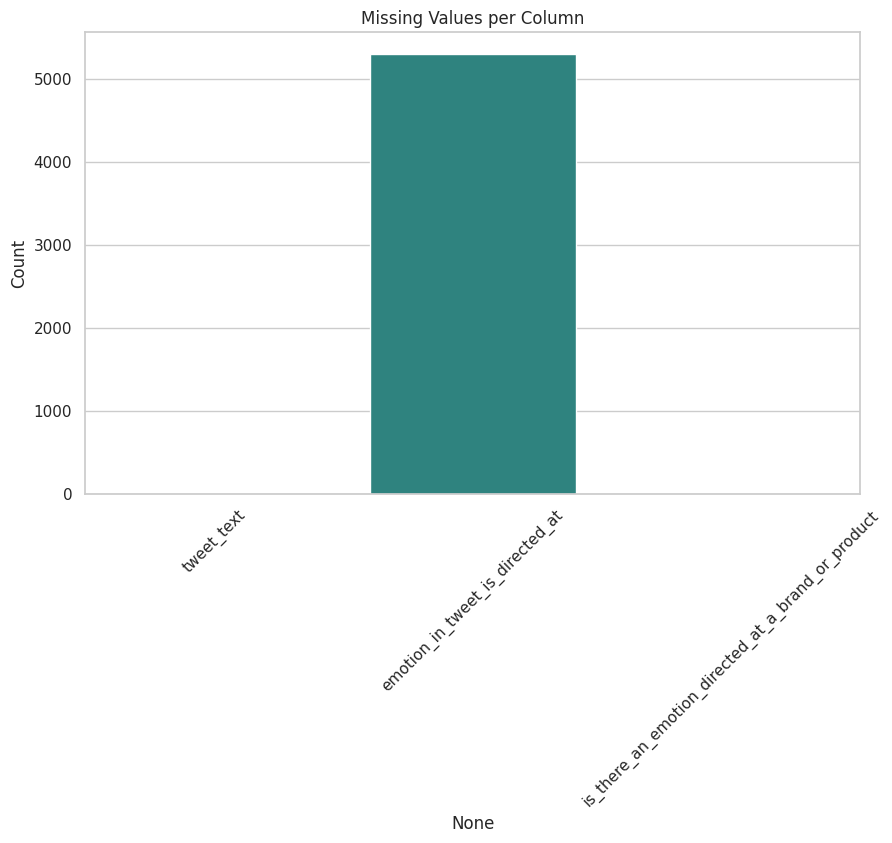

<ipython-input-3-09979b686a8a>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="is_there_an_emotion_directed_at_a_brand_or_product", palette="coolwarm")


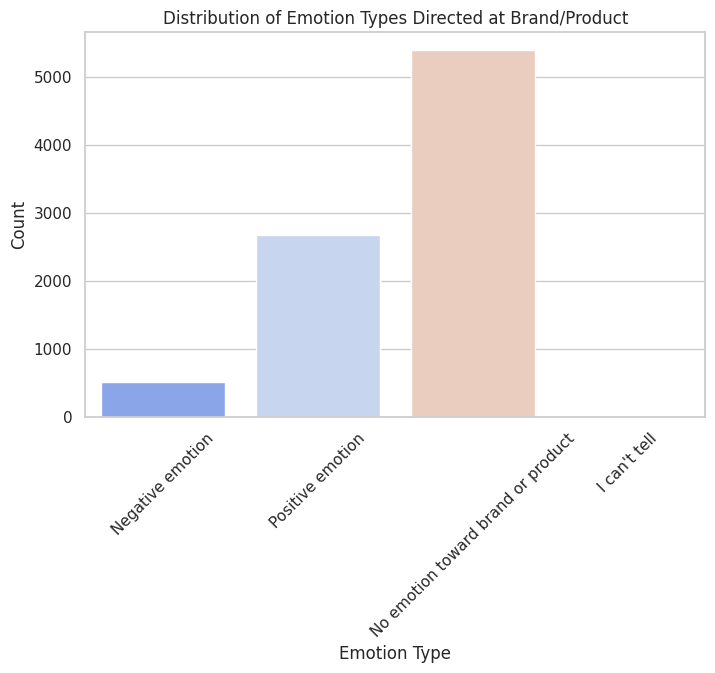

<Figure size 1000x700 with 0 Axes>

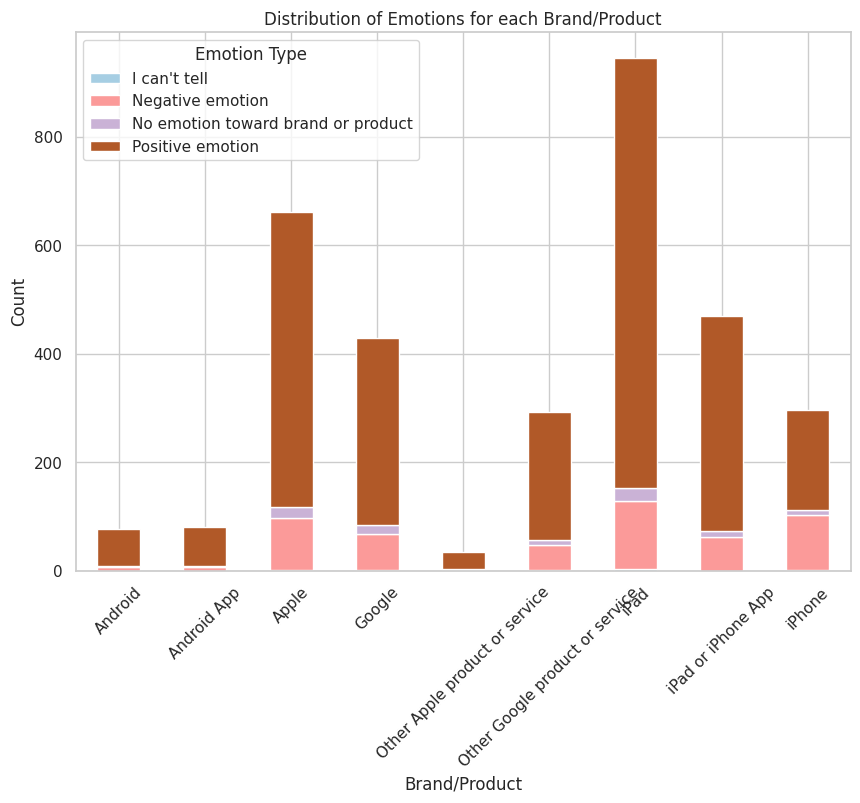

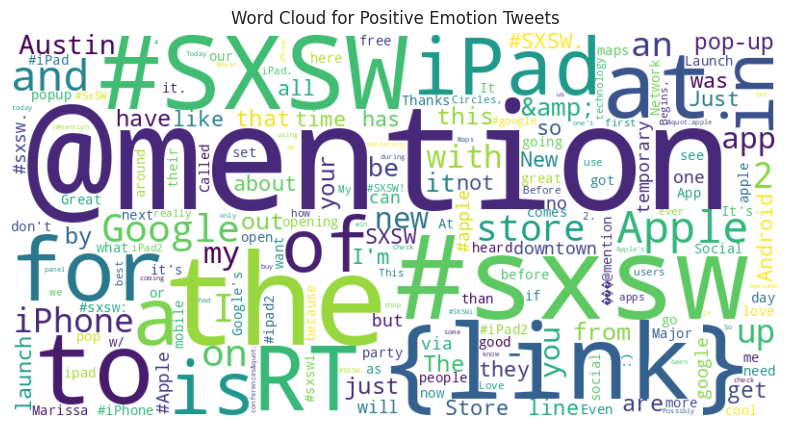

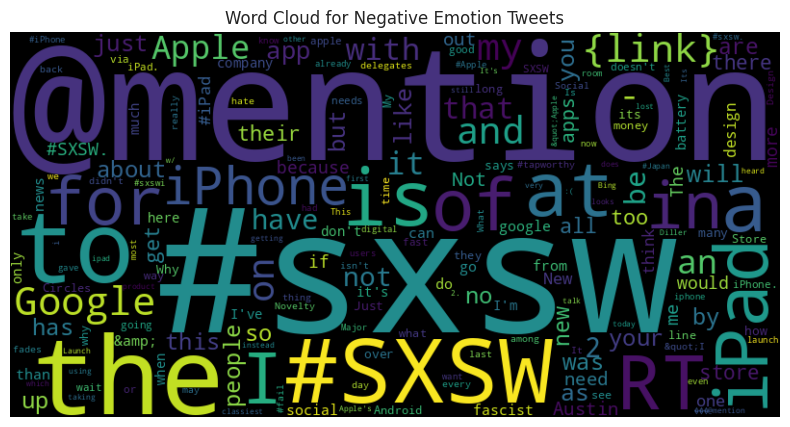

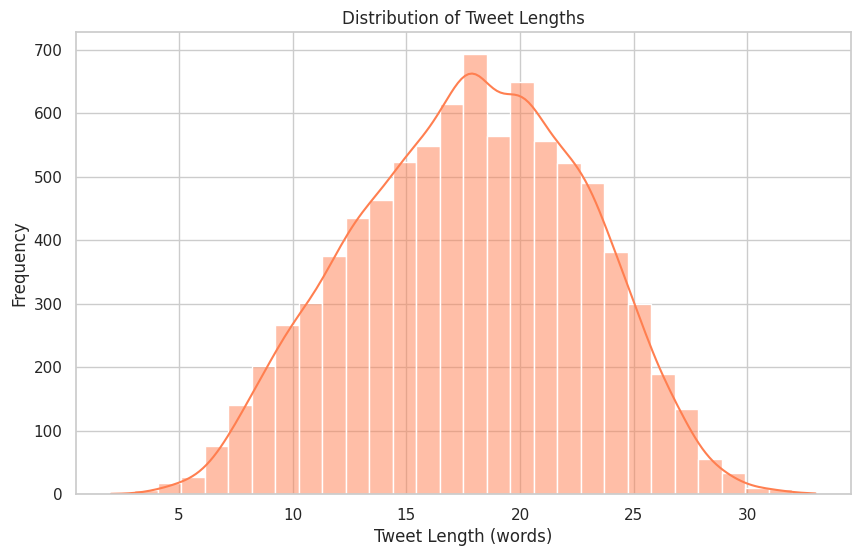

27

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np

# Set up plots
sns.set(style="whitegrid")

# Check for missing values
missing_values = data.isnull().sum()

# Distribution of Emotion Types
emotion_counts = data["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

# Distribution of Emotions by Brand/Product
emotion_by_brand = data.groupby("emotion_in_tweet_is_directed_at")["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts().unstack()

# Text Analysis: Word Frequency in Positive and Negative Tweets
positive_tweets = data[data["is_there_an_emotion_directed_at_a_brand_or_product"] == "Positive emotion"]["tweet_text"].dropna()
negative_tweets = data[data["is_there_an_emotion_directed_at_a_brand_or_product"] == "Negative emotion"]["tweet_text"].dropna()

positive_words = ' '.join(positive_tweets).split()
negative_words = ' '.join(negative_tweets).split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Plot Missing Values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot Distribution of Emotion Types
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="is_there_an_emotion_directed_at_a_brand_or_product", palette="coolwarm")
plt.title("Distribution of Emotion Types Directed at Brand/Product")
plt.xlabel("Emotion Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot Emotion Distribution by Brand/Product
plt.figure(figsize=(10, 7))
emotion_by_brand.plot(kind="bar", stacked=True, colormap="Paired", figsize=(10, 7))
plt.title("Distribution of Emotions for each Brand/Product")
plt.xlabel("Brand/Product")
plt.ylabel("Count")
plt.legend(title="Emotion Type")
plt.xticks(rotation=45)
plt.show()

# Generate Word Clouds for Positive and Negative Tweets
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(positive_word_counts)
negative_wordcloud = WordCloud(width=800, height=400, background_color="black").generate_from_frequencies(negative_word_counts)

# Display Positive Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Emotion Tweets")
plt.show()

# Display Negative Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Emotion Tweets")
plt.show()

# Analysis of Tweet Length
data['tweet_length'] = data['tweet_text'].dropna().apply(lambda x: len(x.split()))

# Plot Distribution of Tweet Lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], bins=30, kde=True, color="coral")
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length (words)")
plt.ylabel("Frequency")
plt.show()

# Check for Duplicate Tweets
duplicate_tweets = data['tweet_text'].duplicated().sum()

# Display Duplicate Count
duplicate_tweets
